# **Guided Lab - 343.4.7 - Understanding the Transform Function in Pandas**

---



## **Lab Overview**
This lab explores the `pandas.transform()` function using a fictitious sales dataset. The dataset includes transaction details for multiple orders, each containing various products (SKUs).

## **Learning Outcomes:**

By the end of this lab, learners will be abl to:

- Explain the functionality and benefits of `pandas.transform()`.
- Apply `pandas.transform()` to calculate percentages based on grouped data.
- Compare different approaches for achieving similar results in pandas


**Lab Structure:**

1. **Introduction and Dataset:** A brief introduction and loading the sales transactions dataset.
2. **First Approach - Merging:** Demonstrates a multi-step approach using merging to calculate the SKU percentages.
3. **Transform Function:** Introduces `pandas.transform()` and its application to simplify the percentage calculation process.
4. **Comparison and Conclusion:** Compares the two approaches, highlighting the efficiency of `pandas.transform()`.


## **Dataset**

For this lab, we willuse fictitious sales data. In order to keep the dataset small, we have a sample of 12 sales transactions for our company: [Click here to download sales_transaction.csv](https://drive.google.com/file/d/1GxvbD5kV6-zzrbDS3uXUlPtm14sSZkBc/view?usp=sharing)

---
# **Begin**


In [1]:
import pandas as pd

In [2]:
# Do not forget to update the file path
df = pd.read_csv("./Data/sales_transactions.csv")
df



account           name  order       sku  quantity  unit price  ext price
0    383080       Will LLC  10001  B1-20000         7       33.69     235.83
1    383080       Will LLC  10001  S1-27722        11       21.12     232.32
2    383080       Will LLC  10001  B1-86481         3       35.99     107.97
3    412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36
4    412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02
5    412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95
6    412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04
7    412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12
8    218895      Kulas Inc  10006  S1-27722        32       95.66    3061.12
9    218895      Kulas Inc  10006  B1-33087        23       22.55     518.65
10   218895      Kulas Inc  10006  B1-33364         3       72.30     216.90
11   218895      Kulas Inc  10006  B1-20000        -1       72.18     -72.18

- You can see in the data that the file contains 3 different orders (order --> 10001, 10005 and 10006) and that each order has multiple products (aka skus).

- The question we would like to answer is: “What percentage of the order total does each sku represent?”

- For example, if we look at order 10001 with a total of $576.12, the break down would be:

- - B1-20000 = $235.83 or 40.9%

- - S1-27722 = $232.32 or 40.3%

- - B1-86481 = $107.97 or 18.7%

- The tricky part in this calculation is that we need to get a total for each order and combine it back with the transaction level detail in order to get the percentages.

## **First Approach - Merging**
First group the data into a new dataframe and combine it in a multi-step process. Here’s what that approach would look like.

Determining the total by order is simple with the help of the standard groupby aggregation.

In [3]:
Order_Total = df.groupby('order')["ext price"].sum()
Order_Total


order
10001     576.12
10005    8185.49
10006    3724.49
Name: ext price, dtype: float64

Here is a simple image showing what is happening with the standard groupby

# 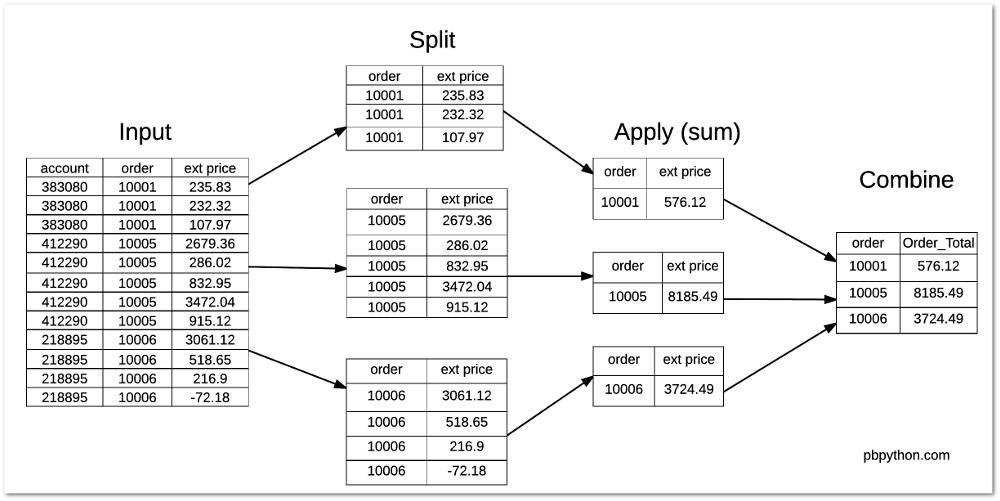

The tricky part is figuring out how to combine this data back with the original dataframe. The first instinct is to create a new dataframe with the totals by order(Order_Total) and merge it back with the original. We could do something like this:



```
# order_total = df.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
df_1 = df.merge(order_total)
df_1["Percent_of_Order"] = df_1["ext price"] / df_1["Order_Total"]
```



This certainly works but there are several steps needed to get the data combined in the manner we need.

## **Second Approach - Using Transform**
Using the original data, let’s try using **transform** and **groupby** and see what we get:

In [4]:
sum_of_orders = df.groupby('order')["ext price"].transform('sum')
sum_of_orders

0      576.12
1      576.12
2      576.12
3     8185.49
4     8185.49
5     8185.49
6     8185.49
7     8185.49
8     3724.49
9     3724.49
10    3724.49
11    3724.49
Name: ext price, dtype: float64

You will notice how this returns a different size data set from our normal **groupby()** functions. Instead of only showing the totals for 3 orders, we retain the same number of items as the original data set. That is the unique feature of using transform .

The final step is pretty simple:

In [5]:
df["Order_Total"] = df.groupby('order')["ext price"].transform('sum')
Order_Total = df["Order_Total"]
Order_Total

0      576.12
1      576.12
2      576.12
3     8185.49
4     8185.49
5     8185.49
6     8185.49
7     8185.49
8     3724.49
9     3724.49
10    3724.49
11    3724.49
Name: Order_Total, dtype: float64

In [6]:
df

account           name  order       sku  quantity  unit price  ext price  \
0    383080       Will LLC  10001  B1-20000         7       33.69     235.83   
1    383080       Will LLC  10001  S1-27722        11       21.12     232.32   
2    383080       Will LLC  10001  B1-86481         3       35.99     107.97   
3    412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36   
4    412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02   
5    412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95   
6    412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04   
7    412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12   
8    218895      Kulas Inc  10006  S1-27722        32       95.66    3061.12   
9    218895      Kulas Inc  10006  B1-33087        23       22.55     518.65   
10   218895      Kulas Inc  10006  B1-33364         3       72.30     216.90   
11   218895      Kulas Inc  10006  B1-20000        -1       72.18     -72.18   

    Order_Total  
0        576.12  
1        576.12  
2        576.12  
3       8185.49  
4       8185.49  
5       8185.49  
6       8185.49  
7       8185.49  
8       3724.49  
9       3724.49  
10      3724.49  
11      3724.49

In [7]:
df["Percent_of_Order"] = df["ext price"] / df["Order_Total"]
Percent_of_Order = df["Percent_of_Order"]
Percent_of_Order

0     0.409342
1     0.403249
2     0.187409
3     0.327330
4     0.034942
5     0.101759
6     0.424170
7     0.111798
8     0.821890
9     0.139254
10    0.058236
11   -0.019380
Name: Percent_of_Order, dtype: float64

In [8]:
df

account           name  order       sku  quantity  unit price  ext price  \
0    383080       Will LLC  10001  B1-20000         7       33.69     235.83   
1    383080       Will LLC  10001  S1-27722        11       21.12     232.32   
2    383080       Will LLC  10001  B1-86481         3       35.99     107.97   
3    412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36   
4    412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02   
5    412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95   
6    412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04   
7    412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12   
8    218895      Kulas Inc  10006  S1-27722        32       95.66    3061.12   
9    218895      Kulas Inc  10006  B1-33087        23       22.55     518.65   
10   218895      Kulas Inc  10006  B1-33364         3       72.30     216.90   
11   218895      Kulas Inc  10006  B1-20000        -1       72.18     -72.18   

    Order_Total  Percent_of_Order  
0        576.12          0.409342  
1        576.12          0.403249  
2        576.12          0.187409  
3       8185.49          0.327330  
4       8185.49          0.034942  
5       8185.49          0.101759  
6       8185.49          0.424170  
7       8185.49          0.111798  
8       3724.49          0.821890  
9       3724.49          0.139254  
10      3724.49          0.058236  
11      3724.49         -0.019380

As an added bonus, you could combine into one statement if you did not want to show the individual order totals:

In [9]:
df["Percent_of_Order"] = df["ext price"] / df.groupby('order')["ext price"].transform('sum')
Percent_of_Order = df["Percent_of_Order"]
Percent_of_Order

0     0.409342
1     0.403249
2     0.187409
3     0.327330
4     0.034942
5     0.101759
6     0.424170
7     0.111798
8     0.821890
9     0.139254
10    0.058236
11   -0.019380
Name: Percent_of_Order, dtype: float64

In [10]:
df

account           name  order       sku  quantity  unit price  ext price  \
0    383080       Will LLC  10001  B1-20000         7       33.69     235.83   
1    383080       Will LLC  10001  S1-27722        11       21.12     232.32   
2    383080       Will LLC  10001  B1-86481         3       35.99     107.97   
3    412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36   
4    412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02   
5    412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95   
6    412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04   
7    412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12   
8    218895      Kulas Inc  10006  S1-27722        32       95.66    3061.12   
9    218895      Kulas Inc  10006  B1-33087        23       22.55     518.65   
10   218895      Kulas Inc  10006  B1-33364         3       72.30     216.90   
11   218895      Kulas Inc  10006  B1-20000        -1       72.18     -72.18   

    Order_Total  Percent_of_Order  
0        576.12          0.409342  
1        576.12          0.403249  
2        576.12          0.187409  
3       8185.49          0.327330  
4       8185.49          0.034942  
5       8185.49          0.101759  
6       8185.49          0.424170  
7       8185.49          0.111798  
8       3724.49          0.821890  
9       3724.49          0.139254  
10      3724.49          0.058236  
11      3724.49         -0.019380

Here is a diagram to show what is happening, Notice that **Order_Total** column is added in a Dataframe.




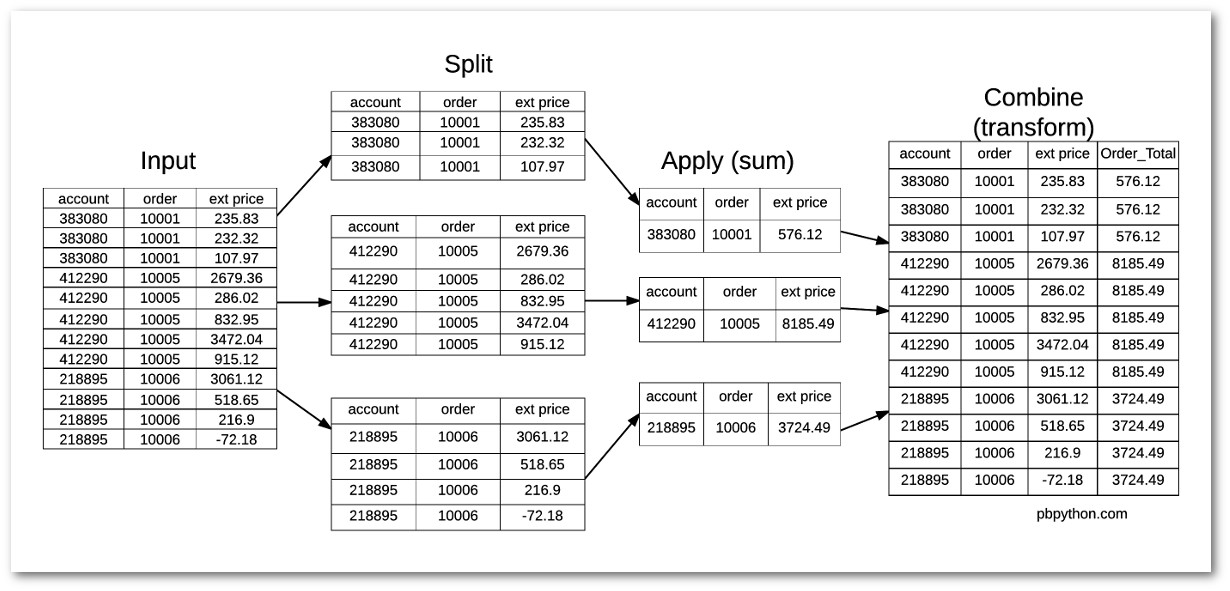

In [ ]:
# Sample DataFrame representing monthly sales revenue
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jan', 'Feb', 'Mar', 'Apr', 'May'],
'Revenue': [1000, 1500, 12000, 20000, 18000,2000, 13400, 14000, 10000, 1800],
'store': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']}

df = pd.DataFrame(data)

# Calculate the cumulative sum of revenue using cumsum()
df['Cumulative_Revenue'] = df['Revenue'].cumsum()

# Display the DataFrame
print(df)

#calculate and add column that shows cumulative sum of revenue by store
df['revenue_bystore'] = df.groupby(['store'])['Revenue'].cumsum()
print(df)

  Month  Revenue store  Cumulative_Revenue
0   Jan     1000     A                1000
1   Feb     1500     A                2500
2   Mar    12000     A               14500
3   Apr    20000     A               34500
4   May    18000     A               52500
5   Jan     2000     B               54500
6   Feb    13400     B               67900
7   Mar    14000     B               81900
8   Apr    10000     B               91900
9   May     1800     B               93700
  Month  Revenue store  Cumulative_Revenue  revenue_bystore
0   Jan     1000     A                1000             1000
1   Feb     1500     A                2500             2500
2   Mar    12000     A               14500            14500
3   Apr    20000     A               34500            34500
4   May    18000     A               52500            52500
5   Jan     2000     B               54500             2000
6   Feb    13400     B               67900            15400
7   Mar    14000     B               81900     